#### How NN approximate Table Lookup value

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#### evaluate constant table value loopup

In [2]:
value = np.array([[21.5, 22.56, 26.9, 34.9, 36.25],
                  [7.19,  0.,  0., 14.4, 45.42],
                  [7.81, 8.44, 8.48, 24.0, 57.5],
                  [0.6,  2.1, 3.1, 14.9,66.9],
                  [-1.0, -5.4, -13.4, 57.9, 100]])

In [3]:
feature = 2

tf.reset_default_graph()

#### Create placehold for input and output

In [4]:
X = tf.placeholder(shape=[feature,None], dtype=tf.float32, name="Row_col")
Y = tf.placeholder(shape=[1,None], dtype=tf.float32, name="value")

#### initialize weight

In [5]:
W1 = tf.get_variable(shape=[10,feature], initializer=tf.contrib.layers.xavier_initializer(seed = 1), dtype=tf.float32,name='weight_l1')
B1 = tf.get_variable(shape=[10,1], initializer=tf.zeros_initializer(), dtype=tf.float32, name='bias_l1')

W2 = tf.get_variable(shape=[4,10], initializer=tf.contrib.layers.xavier_initializer(seed = 2), dtype=tf.float32,name='weight_l2')
B2 = tf.get_variable(shape=[4,1], initializer=tf.zeros_initializer(), dtype=tf.float32, name='bias_l2')

W3 = tf.get_variable(shape=[1,4], initializer=tf.contrib.layers.xavier_initializer(seed = 3),dtype=tf.float32,name='weight_l3')
B3 = tf.get_variable(shape=[1,1], initializer=tf.zeros_initializer(), dtype=tf.float32, name='bias_l3')

#### Forward propagation

In [6]:
Z1 = tf.matmul(W1,X) + B1
A1 = tf.nn.relu(Z1, name='Layer_1')

Z2 = tf.matmul(W2,A1) + B2
A2 = tf.nn.relu(Z2, name='Layer_2')

Z3 = tf.matmul(W3,A2) + B3

#### initialize training parameter

In [14]:
loss = tf.squared_difference(Z3,Y, name='loss')

optimization = tf.train.AdamOptimizer(learning_rate=0.003).minimize(loss)

init = tf.global_variables_initializer()

In [15]:
epoch = 1000
batch_size = 25
iter_cost = []

In [16]:
with tf.Session() as sess:
    sess.run(init)
    
    for _ in range(epoch):
        for j in range(batch_size):
            row = np.random.choice([0,1,2,3,4])
            col = np.random.choice([0,1,2,3,4])
            
            _,l = sess.run([optimization,loss], {X:np.array([row,col]).reshape([2,1]), Y:np.array(value[row,col]).reshape([1,1])})
            
            iter_cost.append(l)
    
    w_1 = W1.eval()
    b_1 = B1.eval()
    
    w_2 = W2.eval()
    b_2 = B2.eval()
    
    w_3 = W3.eval()
    b_3 = B3.eval()

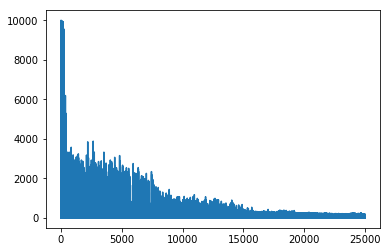

In [17]:
plt.plot(np.array(iter_cost).reshape([25000,1]))

In [18]:
def relu(x):
    return np.maximum(x,0)

In [19]:
a = np.array([-.9,-5.0, 1,3])
relu(a)

array([0., 0., 1., 3.])

In [23]:
approximate_value = np.zeros([5,5])

for i in range(5):
    for j in range(5):
        x = np.array([i,j]).reshape([2,1])

        z1 = np.matmul(w_1,x) + b_1
        a1 = relu(z1)

        z2 = np.matmul(w_2,a1) + b_2
        a2 = relu(z2)

        z3 = np.matmul(w_3,a2) + b_3
    
        approximate_value[i][j] = z3

In [24]:
approximate_value

array([[  7.56555986,  13.91561671,  21.61787215,  29.28654591,
         39.49804251],
       [  7.56555986,   5.41345374,  13.11570918,  20.81796462,
         47.58084395],
       [  7.56555986,   6.42820954,   4.61354621,  16.71467676,
         52.31436841],
       [  2.79340588,  -0.56941129,  -3.88861676,  21.44820122,
         66.83377833],
       [ -4.46046676,  -6.47504653, -11.95853521,  54.73317919,
        100.8917264 ]])

In [25]:
value

array([[ 21.5 ,  22.56,  26.9 ,  34.9 ,  36.25],
       [  7.19,   0.  ,   0.  ,  14.4 ,  45.42],
       [  7.81,   8.44,   8.48,  24.  ,  57.5 ],
       [  0.6 ,   2.1 ,   3.1 ,  14.9 ,  66.9 ],
       [ -1.  ,  -5.4 , -13.4 ,  57.9 , 100.  ]])

#### To learn the value in each cell it take 1000 iteration, that why experience replay is used to stablize the value